In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as mtick

In [3]:
df1=pd.read_csv('size_bm_mom_crsp_m.csv' ,usecols=['permno','date','exchcd','siccd','ret','shrout','prc'],encoding='gbk')
df2=pd.read_csv('mom_crsp_m.csv' ,usecols=['permno','date','exchcd','siccd','ret','shrout','prc'],encoding='gbk')
df=pd.concat([df1,df2],axis=0)
df.drop_duplicates(inplace=True)
# change date format
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [4]:
# to store data
data=pd.DataFrame(index=list(range(1,601)),columns=['nyse_num','amex_num','nasdaq_num','total_num',\
                  'other_num','Agriculture_num','Mining_num','Construction_num','Manufacturing_num',\
                  'Transportation_num','Wholesale_num','Retail_num','Finance_num','Services_num',\
                  'Public_num','nyse_m','amex_m','nasdaq_m','other_m','total_m','Agriculture_m',\
                  'Mining_m','Construction_m','Manufacturing_m','Transportation_m','Wholesale_m',\
                  'Retail_m','Finance_m','Services_m','Public_m','cer','cler'])

In [5]:
# compute data used in Figure7.1 and Figure7.3
i=1
for year in range(1963,2013):    
    for month in range(1,13):
        data['nyse_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['exchcd']==1)|(df['exchcd']==31))])
        data['amex_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['exchcd']==2)|(df['exchcd']==32))])
        data['nasdaq_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['exchcd']==3)|(df['exchcd']==33))])
        data['total_num'][i]=len(df[(df['year']==year)&(df['month']==month)])
        data['Agriculture_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=1)&(df['siccd']<=999))])
        data['Mining_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=1000)&(df['siccd']<=1499))])
        data['Construction_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=1500)&(df['siccd']<=1799))])
        data['Manufacturing_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=2000)&(df['siccd']<=3999))])
        data['Transportation_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=4000)&(df['siccd']<=4999))])
        data['Wholesale_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=5000)&(df['siccd']<=5199))])
        data['Retail_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=5200)&(df['siccd']<=5999))])
        data['Finance_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=6000)&(df['siccd']<=6799))])
        data['Services_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=7000)&(df['siccd']<=8999))])
        data['Public_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['siccd']>=9000)&(df['siccd']<=9999))])
        i=i+1
data['other_num']=data['total_num']-data['nyse_num']-data['amex_num']-data['nasdaq_num']

In [6]:
# calculate market equity
df['me'] = df['prc'].abs()*df['shrout']/1000 
# df_m used for Figure7.2 and Figure7.4
df_m=df.dropna(axis=0, subset=['me'])

In [7]:
# compute data used in Figure7.2 and Figure7.4
i=1
for year in range(1963,2013):    
    for month in range(1,13):
        data['nyse_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['exchcd']==1)|(df_m['exchcd']==31))]['me'])        
        data['amex_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['exchcd']==2)|(df_m['exchcd']==32))]['me'])
        data['nasdaq_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['exchcd']==3)|(df_m['exchcd']==33))]['me'])
        data['total_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)]['me'])
        data['Agriculture_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=1)&(df_m['siccd']<=999))]['me'])
        data['Mining_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=1000)&(df_m['siccd']<=1499))]['me'])
        data['Construction_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=1500)&(df_m['siccd']<=1799))]['me'])
        data['Manufacturing_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=2000)&(df_m['siccd']<=3999))]['me'])
        data['Transportation_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=4000)&(df_m['siccd']<=4999))]['me'])
        data['Wholesale_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=5000)&(df_m['siccd']<=5199))]['me'])
        data['Retail_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=5200)&(df_m['siccd']<=5999))]['me'])
        data['Finance_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=6000)&(df_m['siccd']<=6799))]['me'])
        data['Services_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=7000)&(df_m['siccd']<=8999))]['me'])
        data['Public_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df_m['siccd']>=9000)&(df_m['siccd']<=9999))]['me'])
        i=i+1
data['other_m']=data['total_m']-data['nyse_m']-data['amex_num']-data['nasdaq_m']

In [8]:
# df_r used for Table7.3 and Figure7.5
df_r=df.dropna(axis=0, subset=['ret'])
df_r=df_r[(df_r['date'] < '2013-1-1') & (df_r['date'] > '1963-7-1')]
df_r['ret']=df_r['ret']*100
# import risk-free security return data
rf=pd.read_csv('F-F_Factor.csv' ,usecols=['date','RF'],encoding='gbk')
rf['date']=pd.to_datetime(rf['date'])
rf['year']=rf['date'].dt.year
rf['month']=rf['date'].dt.month
rf=rf.drop(['date'],axis=1)
# merge and calculate the excess return
df_r=pd.merge(df_r,rf,on=['year','month'])
df_r['ret_rf']=df_r['ret']-df_r['RF']

In [9]:
# compute mkt factor
mkt=[]
for year in range(1963,2013):    
    for month in range(1,13):
        temp=df_r[(df_r['year']==year)&(df_r['month']==month)]
        temp['me_weight']=temp['me']/sum(temp['me'])
        mkt.append(sum(temp['me_weight']*temp['ret_rf']))
# compute compounded excess return and cumulative log excess return
mkt=[x/100+1 for x in mkt]
temp1=1
temp2=1
i=1
for x in mkt:
    temp1=temp1*x
    temp2=np.log(temp1)
    data['cer'][i]=temp1
    data['cler'][i]=temp2
    i=i+1

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
def result(df,columnsame): 
    name=['Mean','SD','Skew','Kurt','Min','5%','25%','Median','75%','95%','Max','n']
    result=pd.DataFrame(index=list(range(1,601)),columns=name)
    i=0;
    for year in range(1963,2013):    
        for month in range(1,13):
            temp=df[(df['year']==year)&(df['month']==month)][columnsame]
            result.iloc[i,0]=temp.mean()
            result.iloc[i,1]=temp.std()
            result.iloc[i,2]=temp.skew()
            result.iloc[i,3]=temp.kurt()
            result.iloc[i,4]=temp.min()
            result.iloc[i,5]=temp.quantile(0.05)
            result.iloc[i,6]=temp.quantile(0.25)
            result.iloc[i,7]=temp.quantile(0.50)
            result.iloc[i,8]=temp.quantile(0.75)
            result.iloc[i,9]=temp.quantile(0.95)
            result.iloc[i,10]=temp.max()
            result.iloc[i,11]=len(temp)
            i=i+1
    result=result.drop([1,2,3,4,5,6],axis=0)
    return result

In [11]:
# make datetime index
x=[]
for year in range(1963,2013):    
    for month in range(1,13):
            x.append(str(year)+'-'+str(month))
data.index =pd.to_datetime(x)

In [12]:
# print Table7.3
result1=result(df_r,'ret')
result2=result(df_r,'ret_rf')
name=['Mean','SD','Skew','Kurt','Min','5%','25%','Median','75%','95%','Max','n']
results=pd.DataFrame(index=['ret','RET'],columns=name)
for i in range(12):
    results.iloc[0,i]=result2.iloc[:,i].mean()
    results.iloc[1,i]=result1.iloc[:,i].mean()
print(results)

         Mean       SD     Skew     Kurt      Min       5%      25%  \
ret  0.795119  15.5023  3.12023  59.8167 -67.8727 -19.3552 -6.68591   
RET   1.21881  15.5023  3.12023  59.8167  -67.449 -18.9315 -6.26222   

        Median      75%      95%      Max        n  
ret   -0.35937  6.50277  23.7842  266.659  4752.71  
RET  0.0643167  6.92646  24.2079  267.083  4752.71  


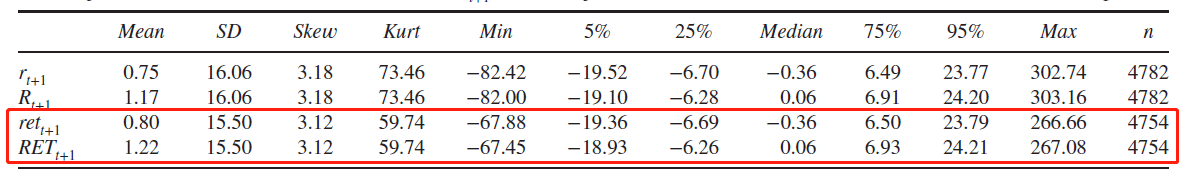

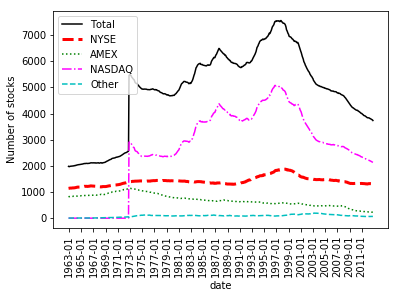

In [14]:
# plot Figure7.1
plt.figure()
plt.plot(data['total_num'], c='k', ls='-',label='Total')
plt.plot(data['nyse_num'], c='r', ls='--', lw=3,label='NYSE')
plt.plot(data['amex_num'], c='g', ls=':',label='AMEX')
plt.plot(data['nasdaq_num'], c='magenta', ls='-.',label='NASDAQ')
plt.plot(data['other_num'], c='c', ls='--',label='Other')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)  
plt.xlabel('date')
plt.ylabel('Number of stocks')
plt.legend()
plt.show()

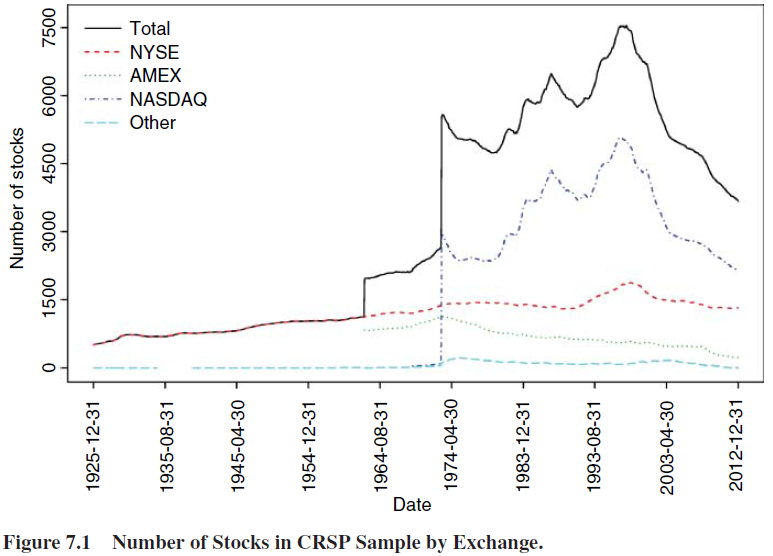

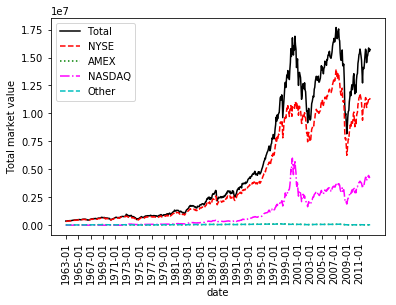

In [15]:
# plot Figure7.2
plt.figure()
plt.plot(data['total_m'], c='k', ls='-',label='Total')
plt.plot(data['nyse_m'], c='r', ls='--',label='NYSE')
plt.plot(data['amex_m'], c='g', ls=':',label='AMEX')
plt.plot(data['nasdaq_m'], c='magenta', ls='-.',label='NASDAQ')
plt.plot(data['other_m'], c='c', ls='--',label='Other')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)   
plt.xlabel('date')
plt.ylabel('Total market value')
plt.legend()
plt.show()

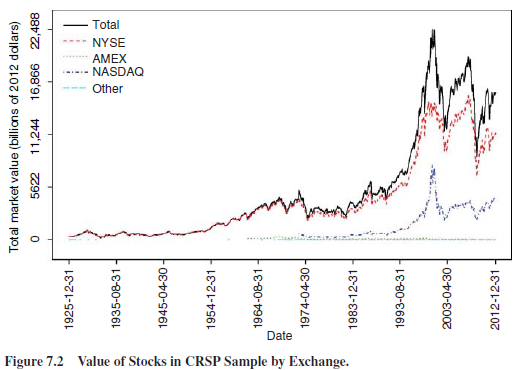

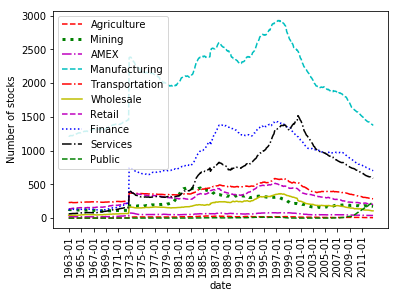

In [16]:
# plot Figure7.3
plt.figure()
plt.plot(data['Agriculture_num'], c='r', ls='--',label='Agriculture')
plt.plot(data['Mining_num'], c='g', ls=':', lw=3,label='Mining')
plt.plot(data['Construction_num'], c='m', ls='-.',label='AMEX')
plt.plot(data['Manufacturing_num'], c='c', ls='--',label='Manufacturing')
plt.plot(data['Transportation_num'], c='r', ls='-.',label='Transportation')
plt.plot(data['Wholesale_num'], c='y', ls='-',label='Wholesale')
plt.plot(data['Retail_num'], c='m', ls='--',label='Retail')
plt.plot(data['Finance_num'], c='b', ls=':',label='Finance')
plt.plot(data['Services_num'], c='k', ls='-.',label='Services')
plt.plot(data['Public_num'], c='g', ls='--',label='Public')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)  
plt.xlabel('date')
plt.ylabel('Number of stocks')
plt.legend()
plt.show()

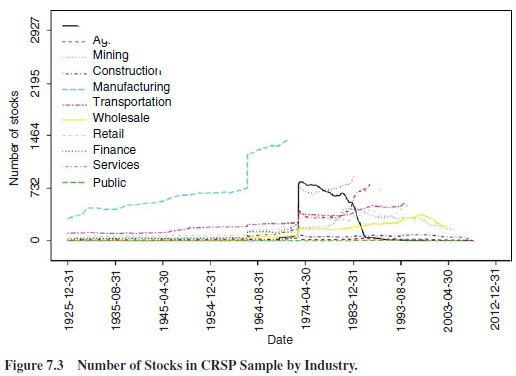

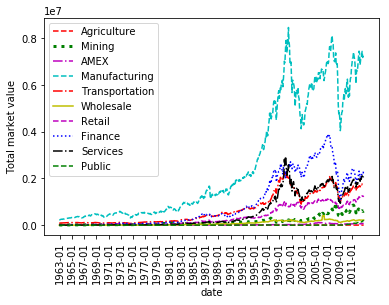

In [17]:
# plot Figure7.4
plt.figure()
plt.plot(data['Agriculture_m'], c='r', ls='--',label='Agriculture')
plt.plot(data['Mining_m'], c='g', ls=':', lw=3,label='Mining')
plt.plot(data['Construction_m'], c='m', ls='-.',label='AMEX')
plt.plot(data['Manufacturing_m'], c='c', ls='--',label='Manufacturing')
plt.plot(data['Transportation_m'], c='r', ls='-.',label='Transportation')
plt.plot(data['Wholesale_m'], c='y', ls='-',label='Wholesale')
plt.plot(data['Retail_m'], c='m', ls='--',label='Retail')
plt.plot(data['Finance_m'], c='b', ls=':',label='Finance')
plt.plot(data['Services_m'], c='k', ls='-.',label='Services')
plt.plot(data['Public_m'], c='g', ls='--',label='Public')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)   
plt.xlabel('date')
plt.ylabel('Total market value')
plt.legend()
plt.show()

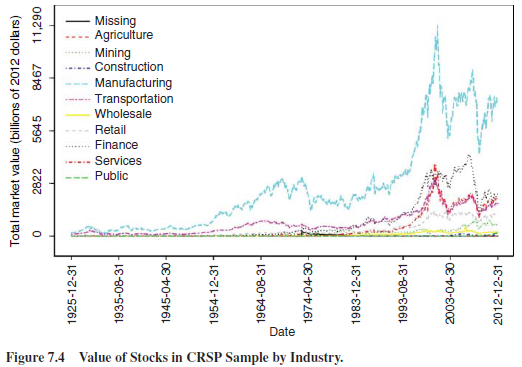

Text(0,0.5,'Cumulative MKT')

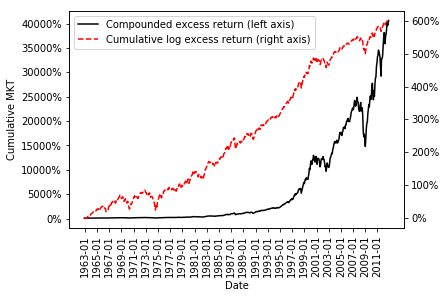

In [13]:
# plot Figure7.5
fig = plt.figure()
ax1 = fig.add_subplot(111)
lns1=ax1.plot(data['cer']*100, '-k', label = 'Compounded excess return (left axis)')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
lns2= ax2.plot(data['cler']*100, '--r', label = 'Cumulative log excess return (right axis)')
lns = lns1+lns2
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
ax2.yaxis.set_major_formatter(yticks)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative MKT')

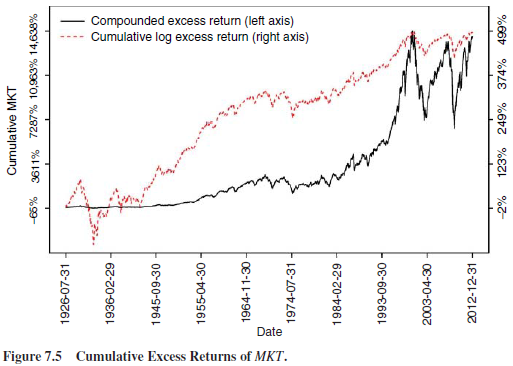